Aufgabe 22.
Nutzen Sie den Datensatz penguins, um eine Klassifikation der Pinguinarten durchzuführen.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [37]:
df = pd.read_csv('../data/penguins.csv')
df.head()

,bill_length_mm,flipper_length_mm,species
0,39.1,181.0,Adelie
1,39.5,186.0,Adelie
2,40.3,195.0,Adelie
3,36.7,193.0,Adelie
4,39.3,190.0,Adelie


a) Wählen Sie zwei numerische Merkmale und stellen Sie die drei Arten im Streudiagramm dar.

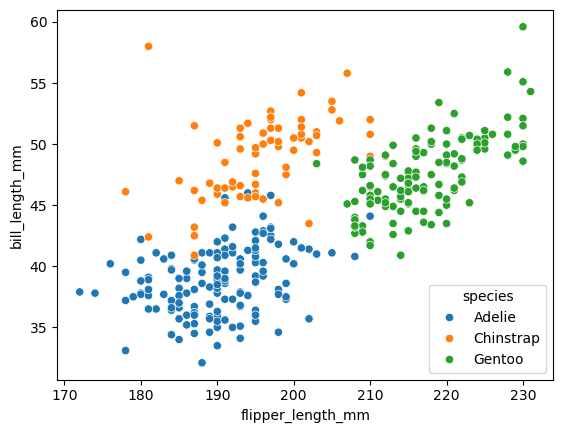

In [38]:
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_length_mm', hue='species');

In [39]:
df.isna().sum()

bill_length_mm       0
flipper_length_mm    0
species              0
dtype: int64

b) Trainieren Sie ein Naive-Bayes-Modell auf Basis dieser zwei Merkmale. Nutzen Sie nur vollständige Daten (dropna() (Python) oder Tables > Missing Data Pattern (JMP)).

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        45
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



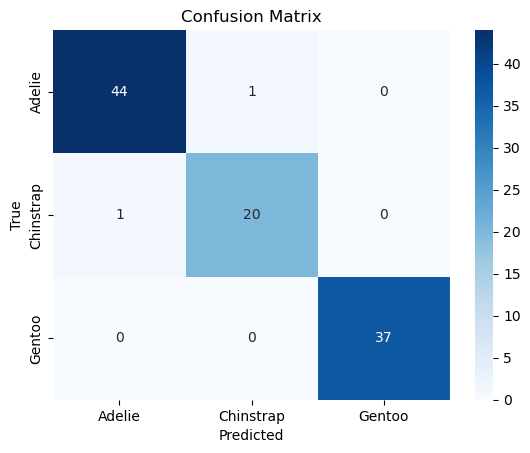

In [40]:
# naive bayes classifier
X = df[['flipper_length_mm', 'bill_length_mm']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

c) Bewerten Sie das Modell mithilfe eines 70/30-Train/Test-Splits anhand von Accuracy und Konfusionsmatrix.

Ich finde beide f1 score und accuracy ganz gut.

d) Vergleichen Sie ihre Ergebnisse mit denen eines anderen Modells (z.B. KNN oder logistische Regression). Welche Unterschiede beobachten Sie?

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        45
   Chinstrap       0.95      1.00      0.98        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



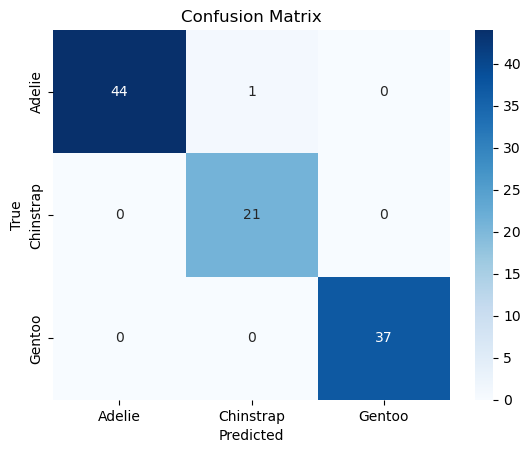

In [41]:
# using KNN classifier
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# KNN hat bessere Ergebnisse, aber ich finde ein bisschen aufwendiger, da man erst die Daten skalieren muss und auch das beste K manuell finden muss.

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        45
   Chinstrap       0.95      0.95      0.95        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



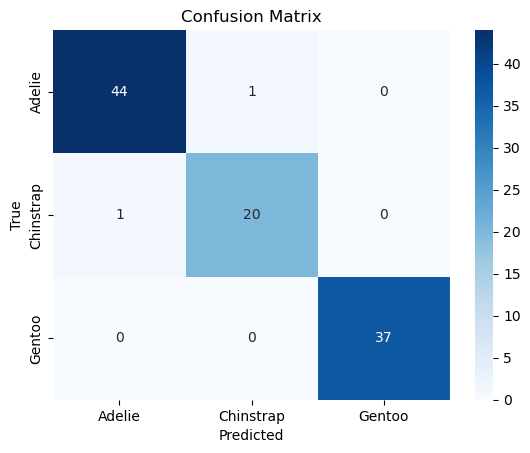

In [43]:
# do a multinomial logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# logistische regression hat eine kleine Verbesserung an Naive Bayes aber dafür der Trainingszeitaufwand lohnt sich nicht, glaube ich.